# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html,'html.parser')

In [5]:
# Extract all rows of data
data_rows = html_soup.find_all('tr', class_='data-row')
for rows in data_rows:
    tds = rows.find_all('td')
    data_list = [item.text for item in tds]
    print(data_list)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [21]:
## Assemble the scraped data into a Pandas DataFrame.
## The columns should have the same headings as the table on the website.

# Create list of column names
col_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create an empty list for table data (that will go with columns)
table_list = []

# Add table data to empty list (similar process to printing the rows above)
for rows in data_rows:
    tds = rows.find_all('td')
    data_list = [item.text for item in tds]
    table_list.append(data_list)

# Create a Pandas DataFrame by using the list of rows and the list of the column names
table_df = pd.DataFrame(table_list, columns = col_names)


In [22]:
# Confirm DataFrame was created successfully
table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
table_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
# Examine the summary statistics of the dataframe
table_df.describe()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
count,1867,1867,1867,1867,1867,1867,1867
unique,1867,1867,1867,360,12,29,199
top,1267,2014-01-17,1267,91,4,-77.0,850.0
freq,1,1,1,8,194,138,25


In [10]:
## If necessary, cast (or convert) the data to the appropriate datetime, int, or float data types.

# Change data types for data analysis
table_df['id'] = table_df['id'].astype(int)
table_df['terrestrial_date'] = table_df['terrestrial_date'].astype('datetime64')
table_df['sol'] = table_df['sol'].astype(int)
table_df['ls'] = table_df['ls'].astype(int)
table_df['month'] = table_df['month'].astype(int)
table_df['min_temp'] = table_df['min_temp'].astype(float)
table_df['pressure'] = table_df['pressure'].astype(float)

# Confirm type changes were successful by examining data types again
table_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [11]:
## Analyze the dataset by using Pandas functions to answer the following questions: 

#1. How many months are there on Mars?
table_df['month'].max()

12

In [12]:
# 2. How many Martian days' worth of data are there?
table_df['id'].nunique()

1867

In [13]:
# 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?

# Find the average minimum daily temperature by month
av_temp = table_df.groupby('month')['min_temp'].mean()
av_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0.5, 1.0, 'Average Minimum Temperature by Month from Min to Max')

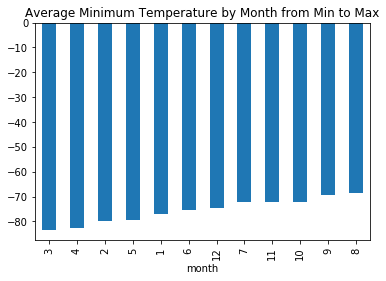

In [14]:
# Plot the results as a bar chart to identify the coldest and hottest months
av_temp.sort_values().plot(kind='bar')
plt.title('Average Minimum Temperature by Month from Min to Max')


Response: Based on the plot, month 3 is the coldest and month 8 is the warmest.

In [15]:
# 4. Which months have the lowest and the highest atmospheric pressure on Mars? 
# Find that average pressure by Martian month
pressure = table_df.groupby('month')['pressure'].mean().sort_values()
pressure

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

Text(0.5, 1.0, 'Atmospheric Pressure by Month from Min to Max')

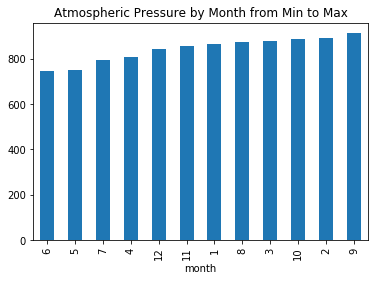

In [16]:
# Plot the average pressure by month
pressure.sort_values().plot(kind='bar')
plt.title('Atmospheric Pressure by Month from Min to Max')

Response: Based on the plot, month 6 has the lowest atmospheric pressure and month 9 has the highest.

Text(0.5, 1.0, 'Daily Minimum Temperature on Mars')

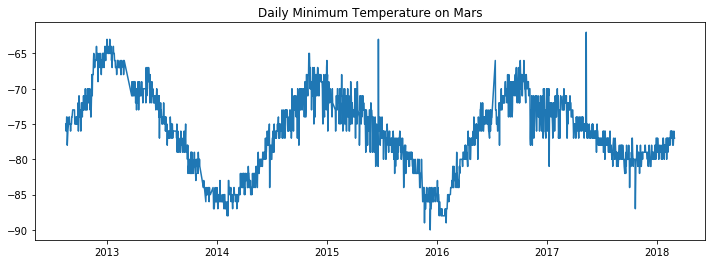

In [17]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Consider how many days elapse on Earth in the time that Mars circles the Sun once.
# Visually estimate the result by plotting the daily minimum temperature.
x_axis = table_df['terrestrial_date']
y_axis = table_df['min_temp']
plt.figure().set_figwidth(12)
plt.locator_params(axis='x', nbins=12)
plt.plot(x_axis, y_axis)
plt.title("Daily Minimum Temperature on Mars")

Response: From the plot, the time between minimum temperatures (troughs) appears to be approximately two terrestrial years - 2014 to 2016. Similarly for the maximum temperatures (peaks) - 2013 to 2015. Therefore, there appears to be 2 years x 365 days/year = 730 terrestrial days in a Martian year.



### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [19]:
# Write the data to a CSV
table_df.to_csv("Mars_DataFrame.csv", header = True)

In [20]:
browser.quit()